# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [2]:
#Import all the import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
import statsmodels.formula.api as sm
import statsmodels.api
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# calculate accuracy measures and confusion matrix
from sklearn import metrics
%matplotlib inlinenecessary modules


UsageError: unrecognized arguments: modules


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [3]:
pima_df = pd.read_csv("diabetes.csv")
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [4]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
pima_df.dtypes
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [4]:
pima_df['Pregnancies']=pima_df['Pregnancies'].replace(0,pima_df['Pregnancies'].median())
pima_df['Glucose']=pima_df['Glucose'].replace(0,pima_df['Glucose'].median())
pima_df['BloodPressure']=pima_df['BloodPressure'].replace(0,pima_df['BloodPressure'].median())
pima_df['SkinThickness']=pima_df['SkinThickness'].replace(0,pima_df['SkinThickness'].median())
pima_df['Insulin']=pima_df['Insulin'].replace(0,pima_df['Insulin'].median())
pima_df['BMI']=pima_df['BMI'].replace(0,pima_df['BMI'].median())
pima_df['DiabetesPedigreeFunction']=pima_df['DiabetesPedigreeFunction'].replace(0,pima_df['DiabetesPedigreeFunction'].median())
pima_df['Age']=pima_df['Age'].replace(0,pima_df['Age'].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [6]:
print(pima_df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.278646  121.656250      72.386719      27.334635   94.652344   
std       3.021516   30.438286      12.096642       9.229014  105.547598   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

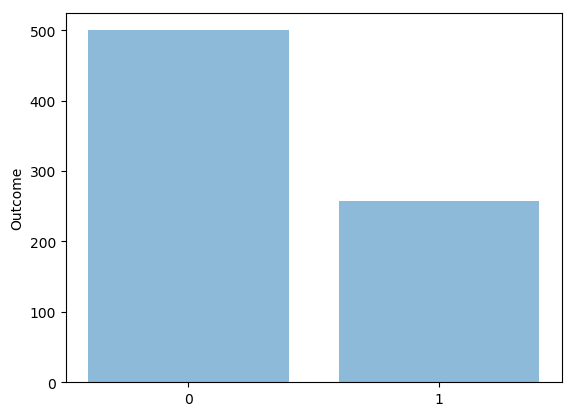

In [13]:
freq = pima_df['Outcome'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
label = ['0','1']
freq = [500,258]
index = np.arange(len(label))
plt.bar(index, freq, align='center', alpha=0.5)
plt.xticks(index, label)
plt.ylabel('Outcome')

 
plt.show()


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83

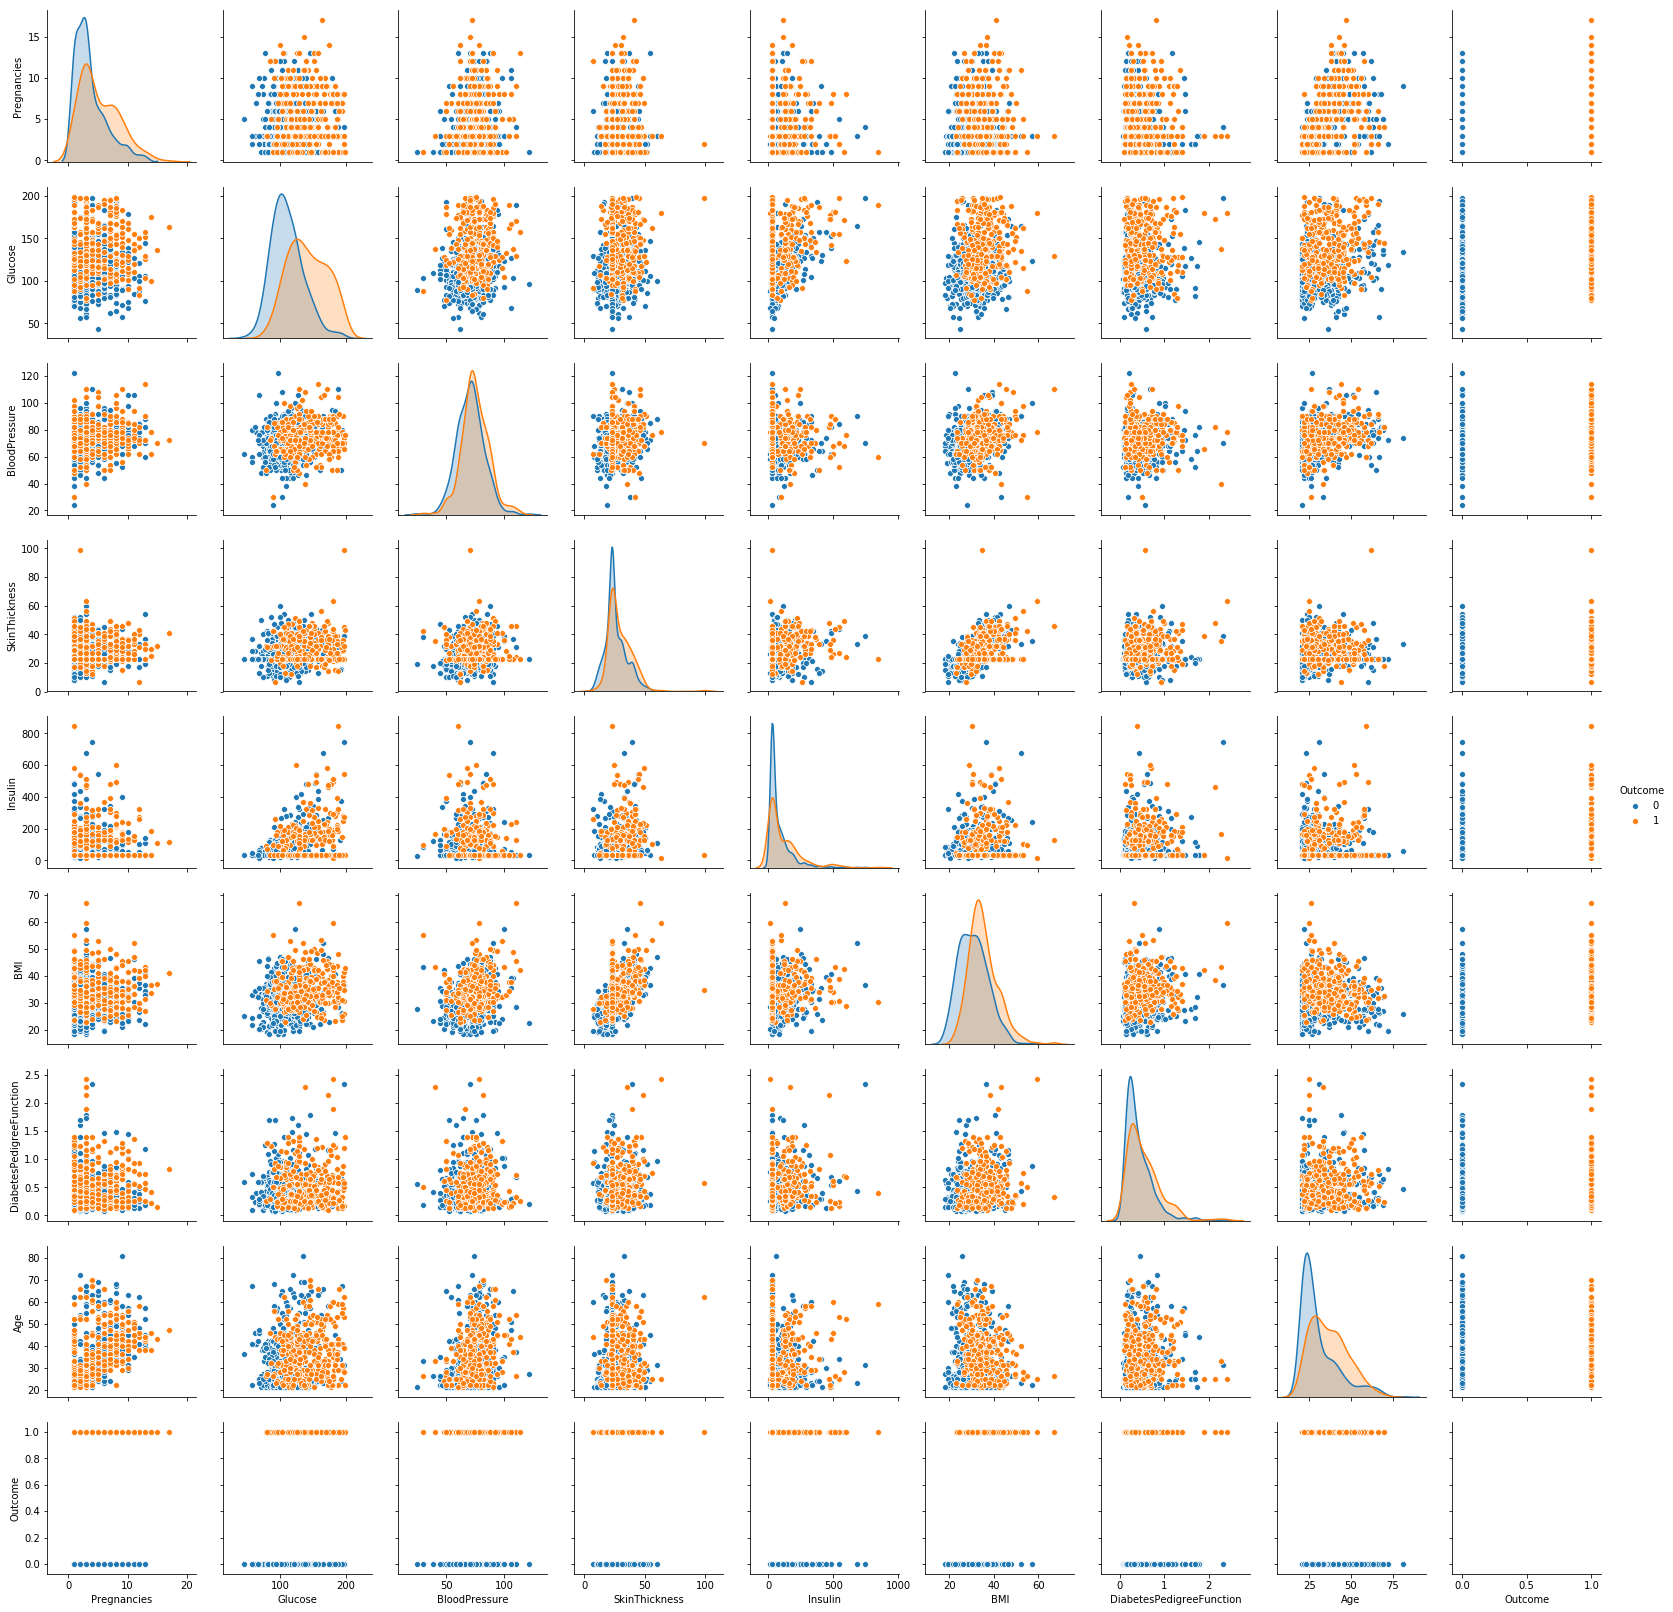

In [5]:
sns.pairplot(pima_df, hue = "Outcome")
# Glucose has some good co relation with other fields in the data

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [7]:
from sklearn.model_selection import train_test_split
X = pima_df.drop("Outcome" , axis=1)

y = pima_df.pop("Outcome")    

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [10]:
y_predict = dt_model.predict(test_set)
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

1.0
0.7272727272727273
[[113  33]
 [ 30  55]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 550)
rfcl = rfcl.fit(train_set, train_labels)

C:\Users\niranjan.nilekani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
y_predict = rfcl.predict(test_set)
print(rfcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.7835497835497836
[[131  15]
 [ 35  50]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [13]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=250)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(train_set, train_labels)

In [14]:
y_predict = abcl.predict(test_set)
print(abcl.score(test_set , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.7142857142857143
[[112  34]
 [ 32  53]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [15]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(train_set, train_labels)

In [16]:
y_predict = bgcl.predict(test_set)

print(bgcl.score(test_set , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.7748917748917749
[[125  21]
 [ 31  54]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 550)
gbcl = gbcl.fit(train_set, train_labels)

In [18]:
y_predict = gbcl.predict(test_set)
print(gbcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.7792207792207793
[[123  23]
 [ 28  57]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.